# Foundations of strategic business analytics - Week 1

In [109]:
import pandas as pd
import numpy as np

df = pd.read_csv("pasta_purchase.csv")

Question 1 :
What is the correct mean and standard deviation of the quantity of pasta purchased by time unit by household?

Question 2 :
In which area are located (i) the poorest household and (ii) the wealthiest household?

In [110]:
df.head()

,HHID,TIME,PASTA,EXPOS,AGE,INCOME,AREA
0,1,1,0.939444,1,61.710758,25186.798772,3
1,1,2,2.560969,2,61.710758,25186.798772,3
2,1,3,0.901123,0,61.710758,25186.798772,3
3,1,4,1.916530,1,61.710758,25186.798772,3
4,1,5,1.548751,0,61.710758,25186.798772,3


In [111]:
df.describe()

,HHID,TIME,PASTA,EXPOS,AGE,INCOME,AREA
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,1000.500000,10.500000,1.841545,0.499100,42.251409,27096.126112,2.996000
std,577.357414,5.766353,1.025911,0.702041,13.766646,15928.188291,1.409622
min,1.000000,1.000000,0.000000,0.000000,18.007529,609.107170,1.000000
25%,500.750000,5.750000,1.108936,0.000000,30.505706,15379.591862,2.000000
50%,1000.500000,10.500000,1.811417,0.000000,42.436092,24487.068020,3.000000
75%,1500.250000,15.250000,2.534365,1.000000,54.362395,35272.533787,4.000000
max,2000.000000,20.000000,6.592769,5.000000,64.984126,141066.966883,5.000000


Question 3 :
What is the maximum pasta quantity a household has bought over the whole time period? (Sum the quantity of pasta by household over time and indicate the maximum)

Question 4 :
What is the average income of households living in area 4?

In [112]:
df.groupby(['AREA'])['INCOME'].mean()

AREA
1    28076.599968
2    26218.857948
3    25879.485698
4    29260.133137
5    26030.910606
Name: INCOME, dtype: float64

In [113]:
max(df.groupby(['HHID'])['PASTA'].sum())

55.36193058243068

Question 5 :
How many households live in area 2, earn more than 20k, and have purchased more than 30 units of pasta over the whole time period?

In [61]:
sum_pasta = lambda x:np.sum(x)

df_area = df[(df['AREA']==2)&(df['INCOME']>20000)]
df_pasta = df_area.groupby(['HHID']).apply(sum_pasta)
print(f"Number of households are {df_pasta[df_pasta['PASTA']>30]['HHID'].count()

218

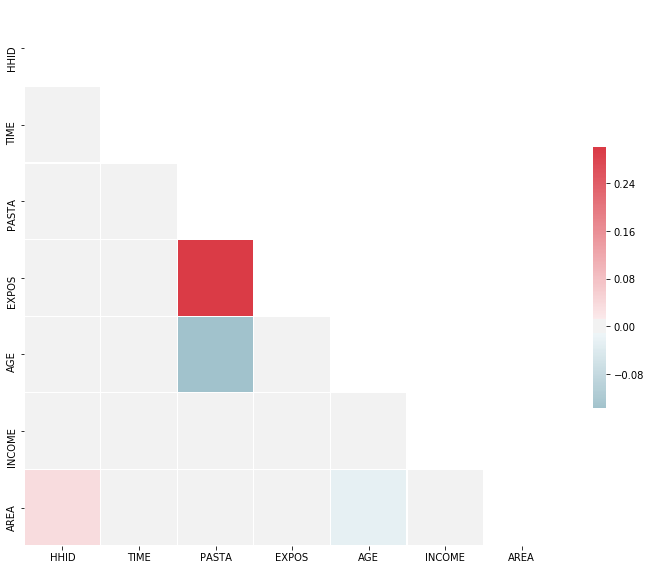

In [65]:
def plot_correlation(data):
    import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
    %matplotlib inline 
    import seaborn as sns

    corr = data.corr()
    mask = np.triu(np.ones_like(corr, dtype=np.bool))

    # Set up the matplotlib figure
    figure, ax = plt.subplots(figsize=(12, 12))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw a heat map 
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.4, cbar_kws={"shrink": .4})
    
plot_correlation(df)

Which of the following graphs reports the correct histogram by household of the total purchase of pasta made by the household over the whole period? (Sum the purchases by household and make a histogram.)

Note that the color or exact representation may be different in your version.

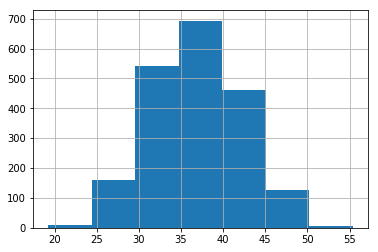

In [74]:
sum_pasta = lambda x:np.sum(x)
df_pasta = df.groupby(['HHID'])['PASTA'].apply(sum_pasta)
df_pasta.describe()
df_pasta.hist(bins=7)

Which of the following graphs reports the correct time series of the overall total purchase of pasta? (Sum the purchases by time units and plot the quantity by time unit.)

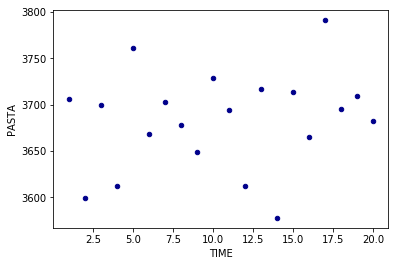

In [108]:
df_pasta_by_time = df.groupby(['TIME']).apply(np.sum)
df_pasta = df_pasta_by_time['PASTA'].reset_index()
df_pasta.plot.scatter(x='TIME',
                      y='PASTA',
                      c='DarkBlue')